Loaded dataframe shape: (26874, 15)
Columns: ['date', 'tmax', 'tmin', 'tavg', 'prcp', 'wspd', 'humidity', 'pressure', 'dew_point', 'cloud_cover', 'city', 'region', 'latitude', 'longitude', 'elevation']
Using date column: date
Filtered to dates >=  2020-01-01 00:00:00 resulting rows: 8612
Using city column: city
Cities available: ['Quetta' 'Karachi' 'Islamabad' 'Lahore']

City: Karachi


/tmp/ipython-input-3371069640.py:33: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[DATE_COL] = pd.to_datetime(df[DATE_COL], infer_datetime_format=True, errors='coerce')


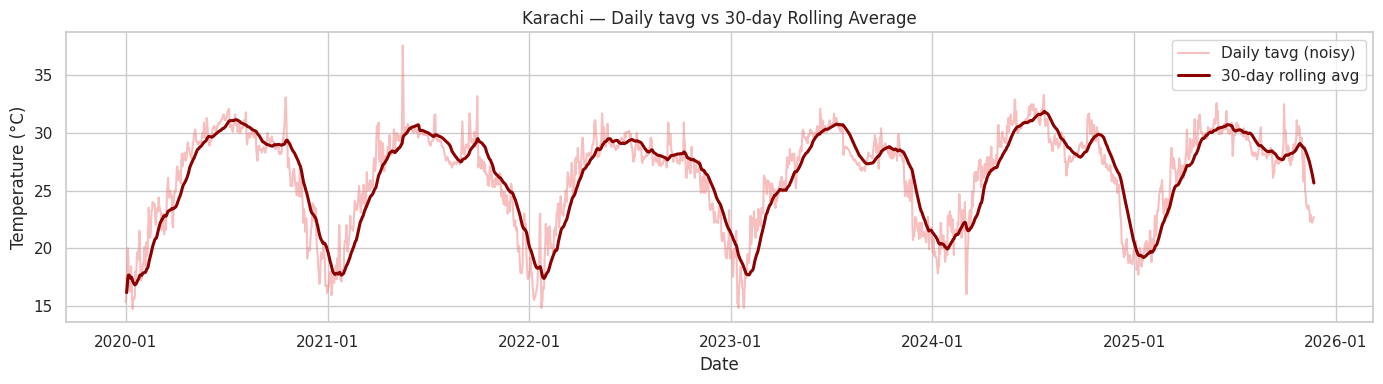


Findings (Temperature):
- Look for the amplitude and seasonality: does Karachi show strong yearly cycles?
- Check whether the daily series is noisy but the rolling average reveals clear seasonal peaks/troughs.
- For coastal cities (e.g., Karachi) expect milder swings; for inland high-altitude or desert-like cities expect larger swings.


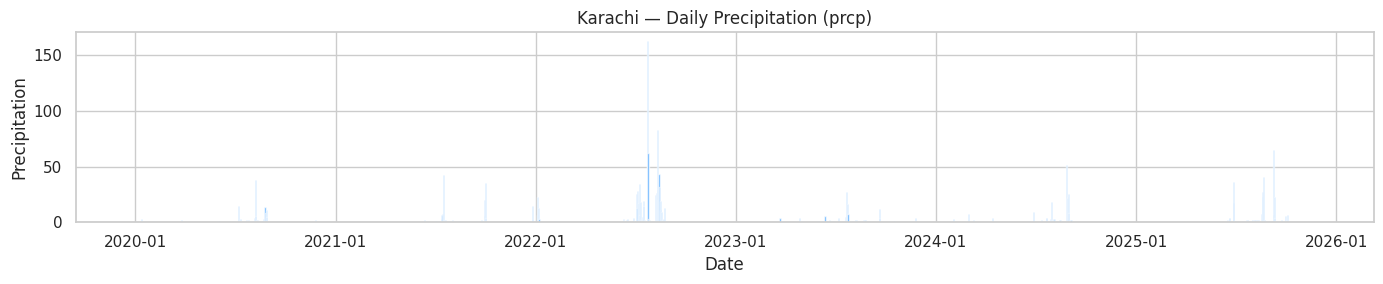


Findings (Precipitation):
- Observe sparsity: many zeros with occasional spikes (rain events).
- Identify monsoon months (typically high prcp) and see if city follows expected seasonal rainfall patterns.


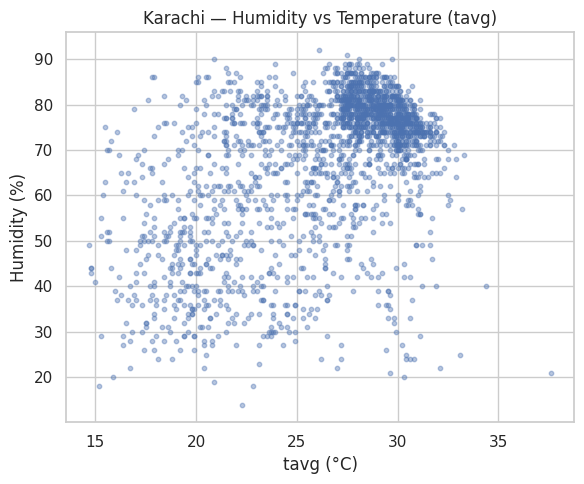


Findings (Humidity vs Temp):
- Look for correlation: coastal/humid cities often show higher humidity at high temps (positive correlation).
- Arid cities may show little correlation or even negative relation (hot but dry).


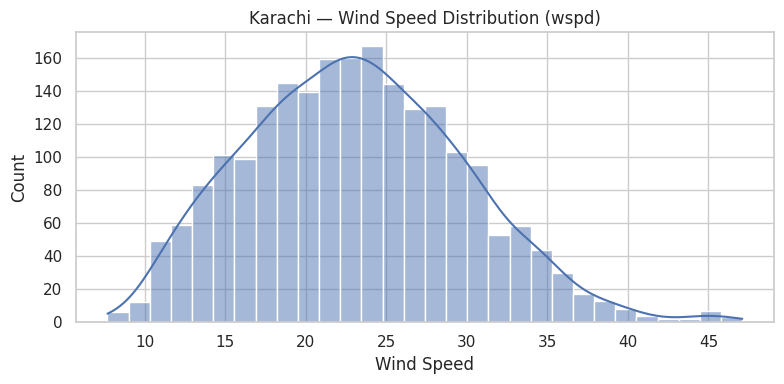


Findings (Wind Speed Distribution):
- Check the typical wind speed (mode) and tail behaviour (strong gusts).
- Coastal cities often show higher mean wind speeds; inland or sheltered valleys may show lower wind speeds.

Summary hints for this city's plots:
- Which months show temperature peaks? Which months show rainfall spikes?
- Does humidity correlate with temperature? Are hot days humid or dry?
- Is windspeed distribution narrow (calm) or wide (gusty)?
- Note any missing data periods or abrupt gaps — these can influence model training later.

City: Lahore


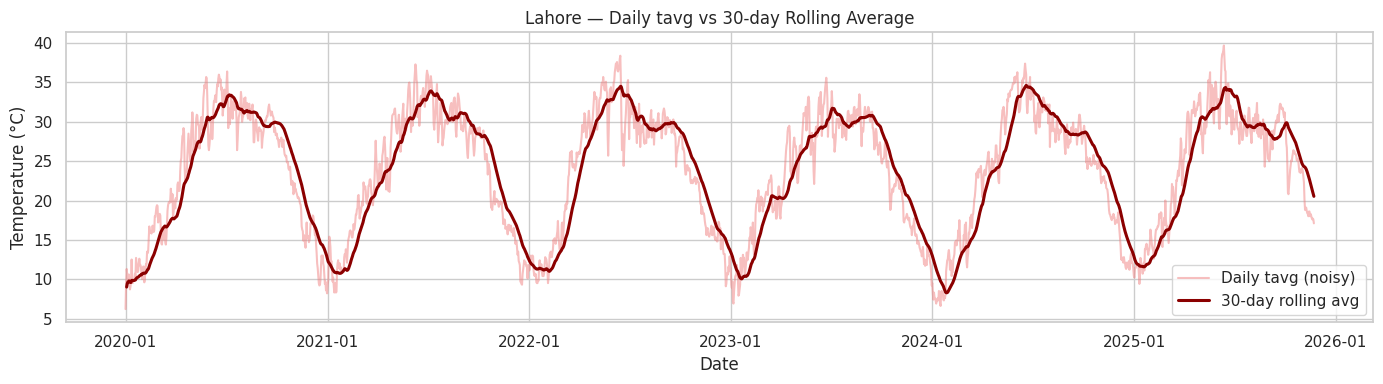


Findings (Temperature):
- Look for the amplitude and seasonality: does Lahore show strong yearly cycles?
- Check whether the daily series is noisy but the rolling average reveals clear seasonal peaks/troughs.
- For coastal cities (e.g., Karachi) expect milder swings; for inland high-altitude or desert-like cities expect larger swings.


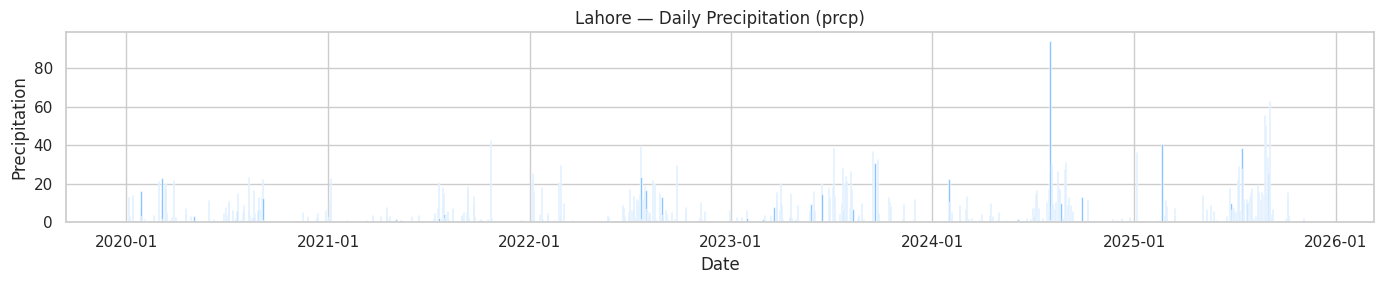


Findings (Precipitation):
- Observe sparsity: many zeros with occasional spikes (rain events).
- Identify monsoon months (typically high prcp) and see if city follows expected seasonal rainfall patterns.


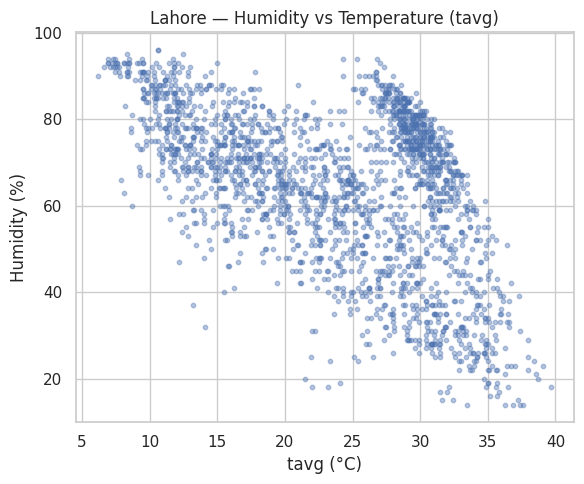


Findings (Humidity vs Temp):
- Look for correlation: coastal/humid cities often show higher humidity at high temps (positive correlation).
- Arid cities may show little correlation or even negative relation (hot but dry).


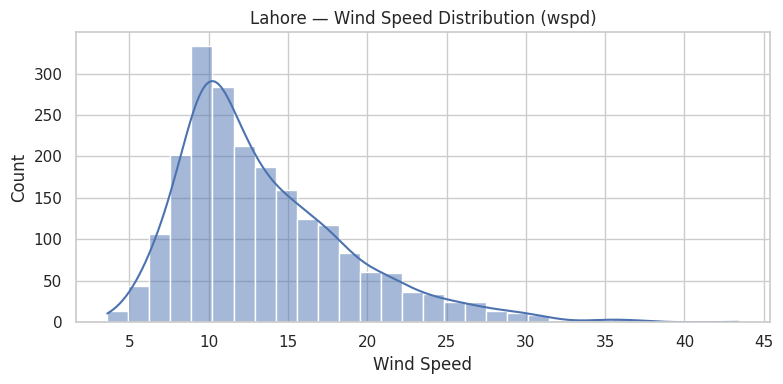


Findings (Wind Speed Distribution):
- Check the typical wind speed (mode) and tail behaviour (strong gusts).
- Coastal cities often show higher mean wind speeds; inland or sheltered valleys may show lower wind speeds.

Summary hints for this city's plots:
- Which months show temperature peaks? Which months show rainfall spikes?
- Does humidity correlate with temperature? Are hot days humid or dry?
- Is windspeed distribution narrow (calm) or wide (gusty)?
- Note any missing data periods or abrupt gaps — these can influence model training later.

City: Islamabad


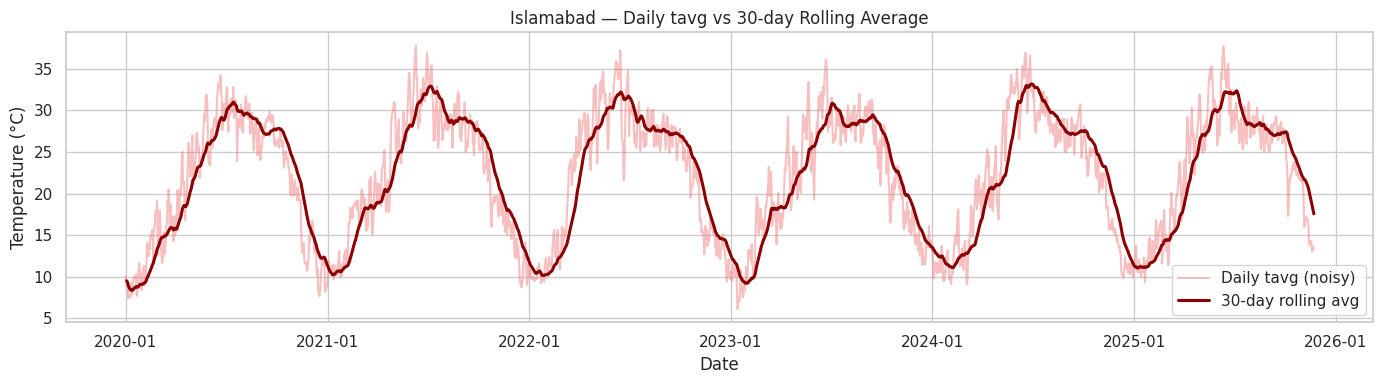


Findings (Temperature):
- Look for the amplitude and seasonality: does Islamabad show strong yearly cycles?
- Check whether the daily series is noisy but the rolling average reveals clear seasonal peaks/troughs.
- For coastal cities (e.g., Karachi) expect milder swings; for inland high-altitude or desert-like cities expect larger swings.


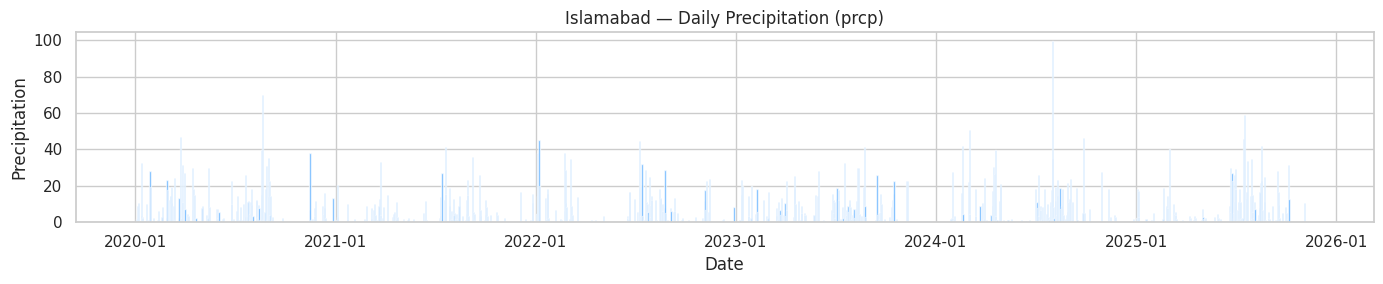


Findings (Precipitation):
- Observe sparsity: many zeros with occasional spikes (rain events).
- Identify monsoon months (typically high prcp) and see if city follows expected seasonal rainfall patterns.


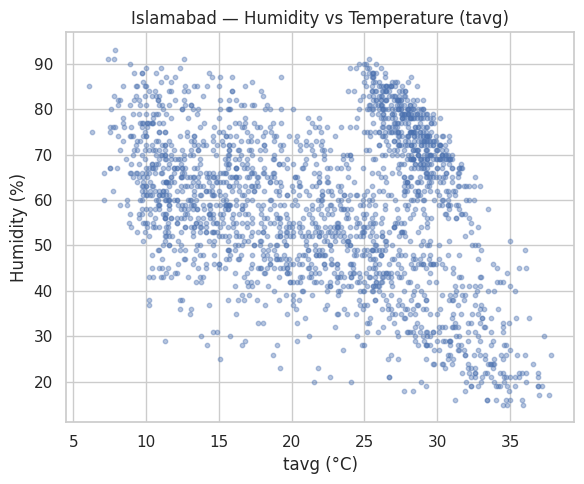


Findings (Humidity vs Temp):
- Look for correlation: coastal/humid cities often show higher humidity at high temps (positive correlation).
- Arid cities may show little correlation or even negative relation (hot but dry).


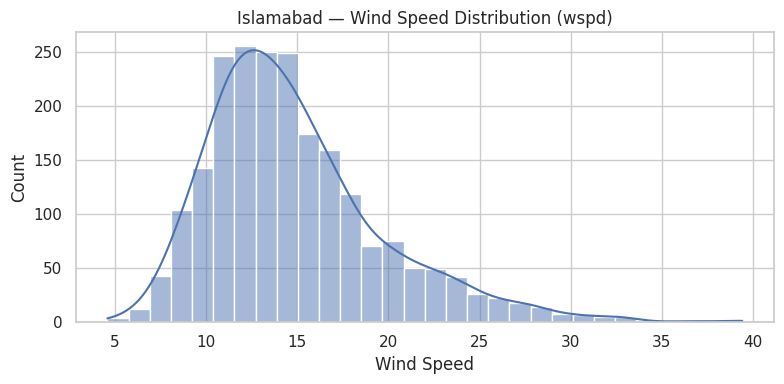


Findings (Wind Speed Distribution):
- Check the typical wind speed (mode) and tail behaviour (strong gusts).
- Coastal cities often show higher mean wind speeds; inland or sheltered valleys may show lower wind speeds.

Summary hints for this city's plots:
- Which months show temperature peaks? Which months show rainfall spikes?
- Does humidity correlate with temperature? Are hot days humid or dry?
- Is windspeed distribution narrow (calm) or wide (gusty)?
- Note any missing data periods or abrupt gaps — these can influence model training later.

City: Quetta


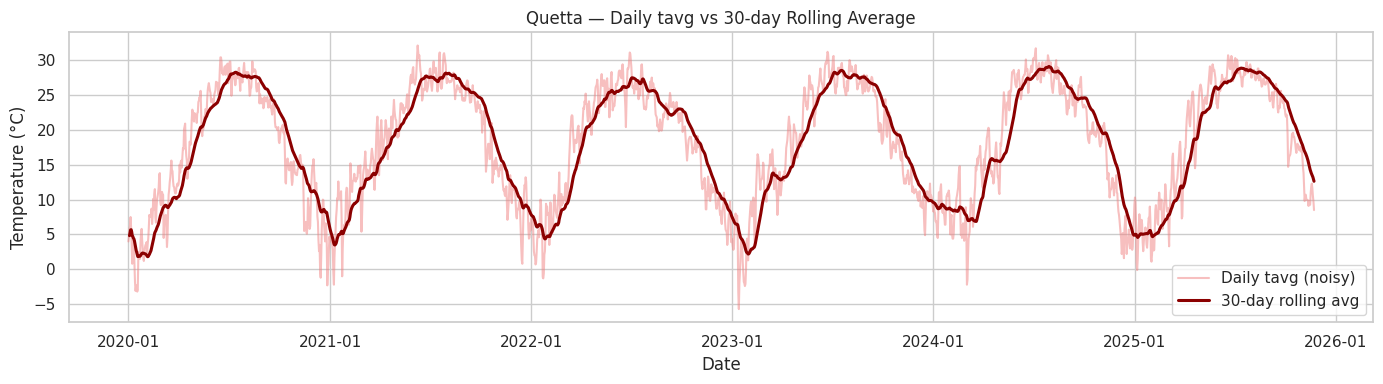


Findings (Temperature):
- Look for the amplitude and seasonality: does Quetta show strong yearly cycles?
- Check whether the daily series is noisy but the rolling average reveals clear seasonal peaks/troughs.
- For coastal cities (e.g., Karachi) expect milder swings; for inland high-altitude or desert-like cities expect larger swings.


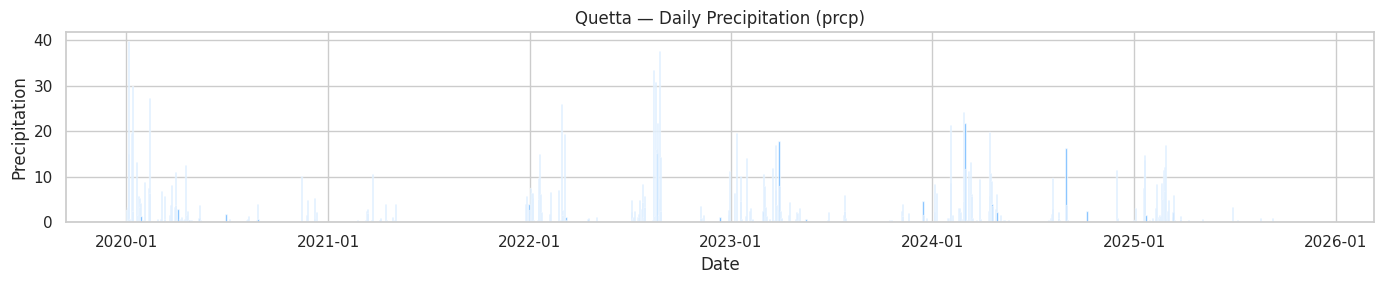


Findings (Precipitation):
- Observe sparsity: many zeros with occasional spikes (rain events).
- Identify monsoon months (typically high prcp) and see if city follows expected seasonal rainfall patterns.


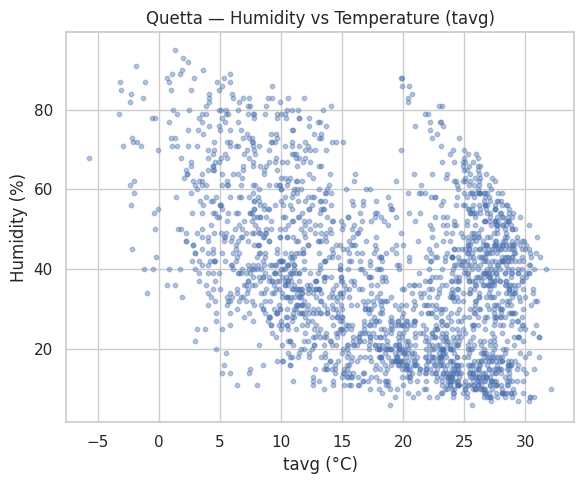


Findings (Humidity vs Temp):
- Look for correlation: coastal/humid cities often show higher humidity at high temps (positive correlation).
- Arid cities may show little correlation or even negative relation (hot but dry).


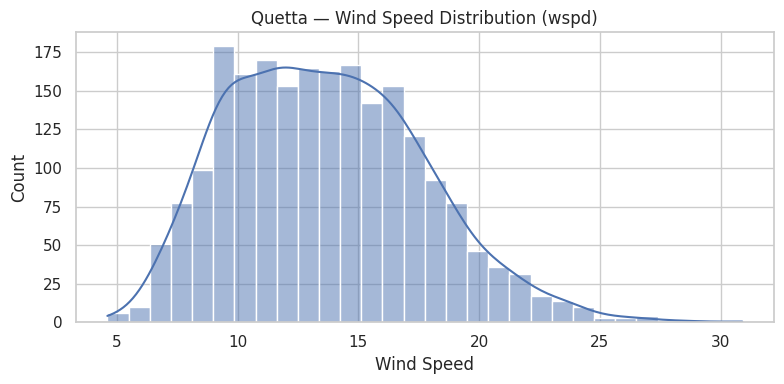


Findings (Wind Speed Distribution):
- Check the typical wind speed (mode) and tail behaviour (strong gusts).
- Coastal cities often show higher mean wind speeds; inland or sheltered valleys may show lower wind speeds.

Summary hints for this city's plots:
- Which months show temperature peaks? Which months show rainfall spikes?
- Does humidity correlate with temperature? Are hot days humid or dry?
- Is windspeed distribution narrow (calm) or wide (gusty)?
- Note any missing data periods or abrupt gaps — these can influence model training later.

EDA script finished. Review the plots above carefully for each city.


In [1]:
# Step 1.1: EDA Script for 4 cities (Karachi, Lahore, Islamabad, Quetta)
# Paste and run this cell in your Colab / Jupyter notebook.
# It will produce 4 plots per city (16 plots total) and print short "Findings" blocks.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

sns.set(style="whitegrid", rc={"figure.figsize": (12, 4)})
plt.rcParams.update({'figure.max_open_warning': 0})

# Path to your CSV - adjust if needed
DATA_PATH = '/content/Weather_2025.csv'

# Load data
df = pd.read_csv(DATA_PATH)
print("Loaded dataframe shape:", df.shape)
print("Columns:", df.columns.tolist())

# Parse date-like column (attempt common names)
date_col_candidates = [c for c in df.columns if c.lower() in ('date','datetime','time','timestamp')]
if len(date_col_candidates) == 0:
    # try to find any column with 'date' substring
    date_col_candidates = [c for c in df.columns if 'date' in c.lower()]
if len(date_col_candidates) == 0:
    raise ValueError("No date column detected automatically. Please ensure there is a date column.")
DATE_COL = date_col_candidates[0]
print("Using date column:", DATE_COL)

df[DATE_COL] = pd.to_datetime(df[DATE_COL], infer_datetime_format=True, errors='coerce')
df = df.sort_values(DATE_COL)
df = df.dropna(subset=[DATE_COL])  # drop rows without valid dates

# Ensure key columns exist; compute tavg if absent and tmin/tmax present
if 'tavg' not in df.columns:
    if 'tmin' in df.columns and 'tmax' in df.columns:
        df['tavg'] = (df['tmin'].astype(float) + df['tmax'].astype(float)) / 2.0
        print("Computed 'tavg' from tmin and tmax.")
    else:
        raise ValueError("tavg not found and cannot be computed (missing tmin/tmax). Add or compute tavg.")

# Fill/convert crucial numeric columns if present
for col in ['prcp','humidity','wspd']:
    if col not in df.columns:
        print(f"Warning: Column '{col}' not found in data. Some plots will be skipped for missing columns.")
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Filter to most recent 5 years (from 2020-01-01 as requested)
START_DATE = pd.Timestamp('2020-01-01')
df_recent = df[df[DATE_COL] >= START_DATE].copy()
print("Filtered to dates >= ", START_DATE, "resulting rows:", df_recent.shape[0])

# Make sure city column exists
city_col_candidates = [c for c in df_recent.columns if c.lower() in ('city','station','location')]
if len(city_col_candidates) == 0:
    raise ValueError("No 'city' (or station/location) column detected in the dataset. Add one or rename.")
CITY_COL = city_col_candidates[0]
print("Using city column:", CITY_COL)
print("Cities available:", df_recent[CITY_COL].unique())

# Focus cities in the prompt
CITIES = ['Karachi', 'Lahore', 'Islamabad', 'Quetta']

# plotting helper for date formatting
date_fmt = DateFormatter("%Y-%m")

# Loop through each city and create plots + findings
for city in CITIES:
    print("\n" + "="*80)
    print(f"City: {city}")
    city_df = df_recent[df_recent[CITY_COL].str.lower() == city.lower()].copy()
    if city_df.shape[0] == 0:
        print(f"NO DATA for {city} in the filtered range ({START_DATE}). Skipping.")
        continue

    city_df = city_df.set_index(DATE_COL).sort_index()

    # Ensure tavg exists and drop NaNs for plotting
    ts = city_df['tavg'].dropna()
    if ts.empty:
        print(f"No tavg data for {city}. Skipping plots that require tavg.")
        continue

    # Plot 1: Daily vs 30-day Rolling Average Temperature
    roll_window = 30
    rolling = ts.rolling(window=roll_window, min_periods=3, center=False).mean()

    plt.figure(figsize=(14,4))
    plt.plot(ts.index, ts.values, color='lightcoral', alpha=0.5, label='Daily tavg (noisy)')
    plt.plot(rolling.index, rolling.values, color='darkred', linewidth=2.2, label=f'{roll_window}-day rolling avg')
    plt.title(f"{city} — Daily tavg vs {roll_window}-day Rolling Average")
    plt.xlabel("Date"); plt.ylabel("Temperature (°C)")
    plt.gca().xaxis.set_major_formatter(date_fmt)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nFindings (Temperature):")
    print(f"- Look for the amplitude and seasonality: does {city} show strong yearly cycles?")
    print("- Check whether the daily series is noisy but the rolling average reveals clear seasonal peaks/troughs.")
    print("- For coastal cities (e.g., Karachi) expect milder swings; for inland high-altitude or desert-like cities expect larger swings.")

    # Plot 2: Daily Precipitation (bar chart)
    if 'prcp' in city_df.columns:
        pr = city_df['prcp'].fillna(0)
        plt.figure(figsize=(14,3))
        plt.bar(pr.index, pr.values, width=2, color='dodgerblue', alpha=0.7)
        plt.title(f"{city} — Daily Precipitation (prcp)")
        plt.xlabel("Date"); plt.ylabel("Precipitation")
        plt.gca().xaxis.set_major_formatter(date_fmt)
        plt.tight_layout()
        plt.show()

        print("\nFindings (Precipitation):")
        print("- Observe sparsity: many zeros with occasional spikes (rain events).")
        print("- Identify monsoon months (typically high prcp) and see if city follows expected seasonal rainfall patterns.")
    else:
        print("\nFindings (Precipitation):")
        print(f"- No 'prcp' column available for {city}; skip precipitation analysis.")

    # Plot 3: Humidity vs Temperature (scatter)
    if 'humidity' in city_df.columns:
        hum = city_df['humidity'].dropna()
        common_idx = ts.index.intersection(hum.index)
        plt.figure(figsize=(6,5))
        plt.scatter(ts.loc[common_idx], hum.loc[common_idx], alpha=0.4, s=10)
        plt.title(f"{city} — Humidity vs Temperature (tavg)")
        plt.xlabel("tavg (°C)"); plt.ylabel("Humidity (%)")
        plt.tight_layout()
        plt.show()

        print("\nFindings (Humidity vs Temp):")
        print("- Look for correlation: coastal/humid cities often show higher humidity at high temps (positive correlation).")
        print("- Arid cities may show little correlation or even negative relation (hot but dry).")
    else:
        print("\nFindings (Humidity vs Temp):")
        print(f"- No 'humidity' column available for {city}; skip humidity analysis.")

    # Plot 4: Wind Speed Distribution (histogram)
    if 'wspd' in city_df.columns:
        wspd = city_df['wspd'].dropna()
        plt.figure(figsize=(8,4))
        sns.histplot(wspd, bins=30, kde=True)
        plt.title(f"{city} — Wind Speed Distribution (wspd)")
        plt.xlabel("Wind Speed")
        plt.tight_layout()
        plt.show()

        print("\nFindings (Wind Speed Distribution):")
        print("- Check the typical wind speed (mode) and tail behaviour (strong gusts).")
        print("- Coastal cities often show higher mean wind speeds; inland or sheltered valleys may show lower wind speeds.")
    else:
        print("\nFindings (Wind Speed Distribution):")
        print(f"- No 'wspd' column available for {city}; skip wind analysis.")

    # Small summary / hints
    print("\nSummary hints for this city's plots:")
    print("- Which months show temperature peaks? Which months show rainfall spikes?")
    print("- Does humidity correlate with temperature? Are hot days humid or dry?")
    print("- Is windspeed distribution narrow (calm) or wide (gusty)?")
    print("- Note any missing data periods or abrupt gaps — these can influence model training later.")

print("\n" + "="*80)
print("EDA script finished. Review the plots above carefully for each city.")


/tmp/ipython-input-2236196078.py:29: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[DATE_COL] = pd.to_datetime(df[DATE_COL], infer_datetime_format=True, errors='coerce')


Train range: 2020-01-01 00:00:00 to 2023-12-31 00:00:00 | n_train: 1461
Test range:  2024-01-01 00:00:00 to 2025-11-22 00:00:00 | n_test: 692

Fitting SARIMAX(order=(1, 1, 1)) with month dummies as exog...
                               SARIMAX Results                                
Dep. Variable:                   tavg   No. Observations:                 1461
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2636.569
Date:                Sun, 23 Nov 2025   AIC                           5303.138
Time:                        11:16:47   BIC                           5382.411
Sample:                    01-01-2020   HQIC                          5332.712
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
m_1 

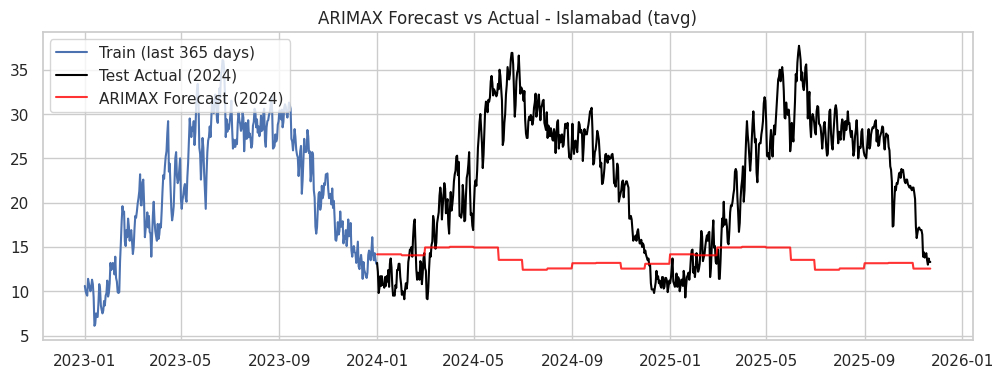

In [2]:
# Baseline 1 (ARIMAX) script for Islamabad (2020-2024)
# Paste and run this cell in your Colab / Jupyter notebook.

# Rationale:
# We use ARIMAX because it's a memory-efficient statistical baseline that models
# short-term autoregressive behavior while allowing simple exogenous seasonal inputs
# (one-hot months). Full SARIMA with m=365 (daily yearly seasonality) is often
# slow or memory-heavy on long daily series; ARIMAX with month dummies is a pragmatic, robust baseline.

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

DATA_PATH = '/content/Weather_2025.csv'  # adjust if needed
CITY = 'Islamabad'
START_DATE = '2020-01-01'

# 1) Load and parse
df = pd.read_csv(DATA_PATH)
# detect date column (common names)
date_candidates = [c for c in df.columns if c.lower() in ('date','datetime','time','timestamp')]
if len(date_candidates) == 0:
    date_candidates = [c for c in df.columns if 'date' in c.lower()]
if len(date_candidates) == 0:
    raise ValueError("No date-like column found. Make sure your CSV has a date column.")
DATE_COL = date_candidates[0]
df[DATE_COL] = pd.to_datetime(df[DATE_COL], infer_datetime_format=True, errors='coerce')
df = df.dropna(subset=[DATE_COL])
df = df.sort_values(DATE_COL)

# 2) Filter Islamabad and from 2020 onward
df_city = df[df['city'].str.lower() == CITY.lower()].copy()
df_city = df_city[df_city[DATE_COL] >= pd.to_datetime(START_DATE)].copy()
if df_city.shape[0] == 0:
    raise ValueError(f"No rows for city={CITY} after {START_DATE}. Check city names and date range.")

df_city = df_city.set_index(DATE_COL).asfreq('D')  # ensure daily index; fills missing dates with NaN
# Interpolate small gaps in tavg; if tavg missing try compute from tmin/tmax
if 'tavg' not in df_city.columns:
    if 'tmin' in df_city.columns and 'tmax' in df_city.columns:
        df_city['tavg'] = (pd.to_numeric(df_city['tmin'], errors='coerce') + pd.to_numeric(df_city['tmax'], errors='coerce')) / 2.0
    else:
        raise ValueError("tavg not present and cannot be computed from tmin/tmax.")
df_city['tavg'] = pd.to_numeric(df_city['tavg'], errors='coerce')
# Interpolate time-based gaps and forward/backward fill
df_city['tavg'] = df_city['tavg'].interpolate(method='time').ffill().bfill()

# 3) Create exogenous features: one-hot encode month to capture seasonality
months = df_city.index.month
X_exog = pd.get_dummies(months, prefix='m', dtype=int)
X_exog.index = df_city.index

# Align y and exog (drop any remaining NaNs)
y = df_city['tavg'].copy()
mask = ~y.isna()
y = y.loc[mask]
X_exog = X_exog.loc[mask]

# 4) Train/Test split: Train on 2020-01-01 to 2023-12-31, Test on 2024
train_end = pd.Timestamp('2023-12-31')
if train_end not in y.index:
    # ensure boundaries exist by using boolean split
    train_idx = y.index < pd.Timestamp('2024-01-01')
else:
    train_idx = y.index <= train_end

y_train = y.loc[train_idx]
y_test = y.loc[~train_idx]
X_exog_train = X_exog.loc[y_train.index]
X_exog_test = X_exog.loc[y_test.index]

print("Train range:", y_train.index.min(), "to", y_train.index.max(), "| n_train:", len(y_train))
print("Test range: ", y_test.index.min(), "to", y_test.index.max(), "| n_test:", len(y_test))

# 5) Fit SARIMAX (ARIMAX) on training data with exogenous month dummies
# Start with a modest order (1,1,1); you can tune later if needed.
order = (1, 1, 1)
print("\nFitting SARIMAX(order=%s) with month dummies as exog..." % (order,))
model = sm.tsa.SARIMAX(y_train, order=order, seasonal_order=(0,0,0,0), exog=X_exog_train,
                       enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False, maxiter=200)
print(res.summary())

# 6) Forecast for the test period with exogenous features
n_steps = len(y_test)
if n_steps == 0:
    raise ValueError("Test set is empty (no 2024 rows). Ensure data includes 2024.")
forecast_obj = res.get_forecast(steps=n_steps, exog=X_exog_test)
y_pred = forecast_obj.predicted_mean
y_pred.index = y_test.index  # align index

# 7) Compute MAE and RMSE on the 2024 test set
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print("\nARIMAX Results for city =", CITY)
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")

# OPTIONAL: quick plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(y_train.index[-365:], y_train.values[-365:], label='Train (last 365 days)')
plt.plot(y_test.index, y_test.values, label='Test Actual (2024)', color='black')
plt.plot(y_pred.index, y_pred.values, label='ARIMAX Forecast (2024)', color='red', alpha=0.8)
plt.title(f"ARIMAX Forecast vs Actual - {CITY} (tavg)")
plt.legend(); plt.show()


In [3]:
# Step 2.4 (Part 1): XGBoost Preprocessing Script
# This prepares a fully numeric dataset for XGBoost, with city, season, and time features encoded.

import pandas as pd
import numpy as np

DATA_PATH = '/content/Weather_2025.csv'
df = pd.read_csv(DATA_PATH)

# Parse date
date_col_candidates = [c for c in df.columns if c.lower() in ('date','datetime','time','timestamp')]
if len(date_col_candidates) == 0:
    date_col_candidates = [c for c in df.columns if 'date' in c.lower()]
DATE_COL = date_col_candidates[0]
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors='coerce')
df = df.dropna(subset=[DATE_COL])
df = df.sort_values(DATE_COL)

# Add date-related features
df['year'] = df[DATE_COL].dt.year
df['month'] = df[DATE_COL].dt.month
df['day'] = df[DATE_COL].dt.day
df['dayofyear'] = df[DATE_COL].dt.dayofyear

# Create 'season' feature
def month_to_season(m):
    if m in [12, 1, 2]: return 'Winter'
    elif m in [3, 4, 5]: return 'Spring'
    elif m in [6, 7, 8]: return 'Summer'
    else: return 'Autumn'

df['season'] = df['month'].apply(month_to_season)

# Cyclical encoding for day of year
df['day_sin'] = np.sin(2 * np.pi * df['dayofyear']/365)
df['day_cos'] = np.cos(2 * np.pi * df['dayofyear']/365)

# Ensure numeric weather variables exist
numeric_cols = ['tavg','tmin','tmax','humidity','wspd','prcp']
for col in numeric_cols:
    if col not in df.columns:
        print(f"Column {col} missing — will fill with NaN.")
        df[col] = np.nan

# Fill small gaps by interpolation
df[numeric_cols] = df[numeric_cols].interpolate(method='linear', limit_direction='both')

# One-hot encode city, region, and season (if present)
categorical_cols = [col for col in ['city','region','season'] if col in df.columns]
df = pd.get_dummies(df, columns=categorical_cols, dtype=int)

# Drop unneeded columns
drop_cols = [DATE_COL]
df = df.drop(columns=drop_cols, errors='ignore')

# Save preprocessed dataset
df.to_csv('XGBoost_preprocessed.csv', index=False)
print("✅ Preprocessing complete. Saved as 'XGBoost_preprocessed.csv'.")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist()[:15], "...")


✅ Preprocessing complete. Saved as 'XGBoost_preprocessed.csv'.
Shape: (26874, 29)
Columns: ['tmax', 'tmin', 'tavg', 'prcp', 'wspd', 'humidity', 'pressure', 'dew_point', 'cloud_cover', 'latitude', 'longitude', 'elevation', 'year', 'month', 'day'] ...


Data shape: (26874, 29)
Train samples: 24105 Test samples: 2768
[0]	train-rmse:7.09316	test-rmse:7.53917
[100]	train-rmse:3.33388	test-rmse:4.16505
[160]	train-rmse:3.20941	test-rmse:4.16603

✅ XGBoost Baseline Results:
Test MAE:  3.1447
Test RMSE: 4.1660


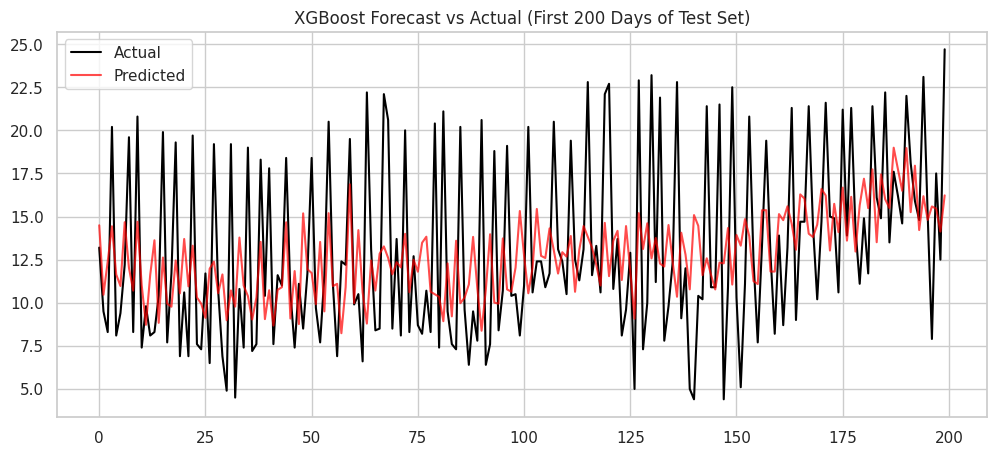

In [4]:
# Step 2.6: Train the XGBoost Baseline (Machine Learning Baseline)

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Load preprocessed data
df = pd.read_csv('XGBoost_preprocessed.csv')
print("Data shape:", df.shape)

# Ensure tavg exists
if 'tavg' not in df.columns:
    raise ValueError("The dataset must contain the 'tavg' column as target.")

# Sort chronologically to respect temporal order
if 'year' in df.columns and 'month' in df.columns and 'day' in df.columns:
    df = df.sort_values(['year','month','day'])

# Define target and features
y = df['tavg']
X = df.drop(columns=['tavg'], errors='ignore')

# HONEST RULE: shift all features by 1 day to prevent data leakage
X = X.shift(1)
X, y = X.iloc[1:], y.iloc[1:]  # drop first NaN row after shift

# Split train/test chronologically
# Train: 2020–2023, Test: 2024
train_mask = df['year'].iloc[1:] < 2024
X_train, X_test = X[train_mask], X[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

print("Train samples:", X_train.shape[0], "Test samples:", X_test.shape[0])

# Convert to DMatrix (optimized XGBoost format)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define model parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train model
watchlist = [(dtrain, 'train'), (dtest, 'test')]
model = xgb.train(params, dtrain, num_boost_round=1000, evals=watchlist,
                  early_stopping_rounds=50, verbose_eval=100)

# Predict and evaluate
y_pred = model.predict(dtest)

mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print("\n✅ XGBoost Baseline Results:")
print(f"Test MAE:  {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")

# Optional: Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:200], label='Actual', color='black')
plt.plot(y_pred[:200], label='Predicted', color='red', alpha=0.7)
plt.title("XGBoost Forecast vs Actual (First 200 Days of Test Set)")
plt.legend(); plt.show()
